### <center> Backward Projecting Canopies onto Raw UAV Images </center>
##### EasyIDP: https://easyidp.readthedocs.io/en/latest/index.html

In [1]:
# Install EasyIDP 2.0 from source
import sys
sys.path.insert(0, r'C:/Users/zack/anaconda3/envs/easyidp/Lib/site-packages/EasyIDP-2.0')
import easyidp as idp

In [2]:
# Lotus sample dataset from EasyIDP
lotus = idp.data.Lotus()

In [3]:
# shapefile with polygon boundaries
roi = idp.ROI(lotus.shp, name_field='plot_id')

[shp][proj] Use projection [WGS 84] for loaded shapefile [plots.shp]


Read shapefile [plots.shp]:   0%|          | 0/112 [00:00<?, ?it/s]

Read shapefile [plots.shp]: 100%|██████████| 112/112 [00:00<00:00, 4641.14it/s]


In [4]:
# check that the shapefile loaded correctly
roi

<easyidp.ROI> with 112 items
[0]	N1W1
array([[139.54052962,  35.73475194],
       [139.54055106,  35.73475596],
       [139.54055592,  35.73473843],
       [139.54053438,  35.73473446],
       [139.54052962,  35.73475194]])
[1]	N1W2
array([[139.54053488,  35.73473289],
       [139.54055632,  35.73473691],
       [139.54056118,  35.73471937],
       [139.54053963,  35.73471541],
       [139.54053488,  35.73473289]])
...
[110]	S4E6
array([[139.54090456,  35.73453742],
       [139.540926  ,  35.73454144],
       [139.54093086,  35.7345239 ],
       [139.54090932,  35.73451994],
       [139.54090456,  35.73453742]])
[111]	S4E7
array([[139.54090986,  35.73451856],
       [139.54093129,  35.73452258],
       [139.54093616,  35.73450504],
       [139.54091461,  35.73450107],
       [139.54090986,  35.73451856]])

In [5]:
# get height (z) values from the digital surface model (DSM)
roi.get_z_from_dsm(lotus.metashape.dsm)

Read z values of roi from DSM [170531.Lotus_dsm.tif]: 100%|██████████| 112/112 [00:01<00:00, 88.82it/s] 


In [ ]:
# check that the z values were added to polygon x,y coordinates
roi # lat/long values converted here to same projection as DSM

In [6]:
# read metashape 3D reconstruction project
ms = idp.Metashape(lotus.metashape.project, chunk_id=0)

In [7]:
# do the backward projection
img_dict_ms = roi.back2raw(ms)

Backward roi to raw images: 100%|██████████| 112/112 [00:01<00:00, 76.48it/s]


In [8]:
# save the backward projection outputs to folder
img_dict_sort = roi.back2raw(ms, save_folder="Lotus_example")

Backward roi to raw images: 100%|██████████| 112/112 [00:01<00:00, 77.13it/s]


Optimising data structures of produced results, this may take some time...


Processing image [DJI_0567]: 100%|██████████| 142/142 [04:00<00:00,  1.69s/it]


In [9]:
# view pixel polygon coordinates for all images with specified polygon ID
img_dict_ms['N1W1']

{'DJI_0479': array([[  43.91987231, 1247.04066843],
        [  69.02210471,  972.89937995],
        [ 353.25370817,  993.30409335],
        [ 328.10701395, 1267.40353337],
        [  43.91987231, 1247.04066843]]),
 'DJI_0480': array([[ 655.3678589 , 1273.01418068],
        [ 681.18303771,  996.48666626],
        [ 965.60719524, 1019.5534612 ],
        [ 939.89408899, 1296.05588135],
        [ 655.3678589 , 1273.01418068]]),
 'DJI_0481': array([[1024.43757186, 1442.10211926],
        [1043.51451282, 1159.41596975],
        [1331.67724597, 1177.40543905],
        [1312.55275283, 1460.04934703],
        [1024.43757186, 1442.10211926]]),
 'DJI_0482': array([[ 924.40250215, 2201.23504256],
        [ 942.63018066, 1910.46713446],
        [1235.98844833, 1923.81031811],
        [1217.80721094, 2214.52736107],
        [ 924.40250215, 2201.23504256]]),
 'DJI_0483': array([[ 842.898091  , 2972.20979563],
        [ 861.62293933, 2676.51568072],
        [1156.3984033 , 2686.82526811],
        [113

In [10]:
# or for just one image
img_dict_ms['N1W1']['DJI_0479']

array([[  43.91987231, 1247.04066843],
       [  69.02210471,  972.89937995],
       [ 353.25370817,  993.30409335],
       [ 328.10701395, 1267.40353337],
       [  43.91987231, 1247.04066843]])

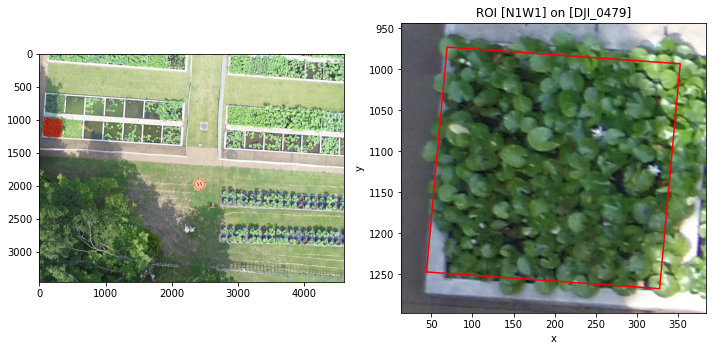

<Figure size 640x480 with 0 Axes>

In [12]:
# preview the results for one image
ms.show_roi_on_img(img_dict_ms, "N1W1", "DJI_0479")

C:\Users/zack/anaconda3/envs/easyidp/Lib/site-packages/EasyIDP-2.0\easyidp\visualize.py:267: UserWarning: Expected title like ['title1', 'title2'], not given 'ROI [N1W1] on [None]', using default title instead
  warnings.warn(f"Expected title like ['title1', 'title2'], not given '{title}', using default title instead")
Reading image files for plotting: 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]


Image data loaded, drawing figures, this may cost a few seconds...


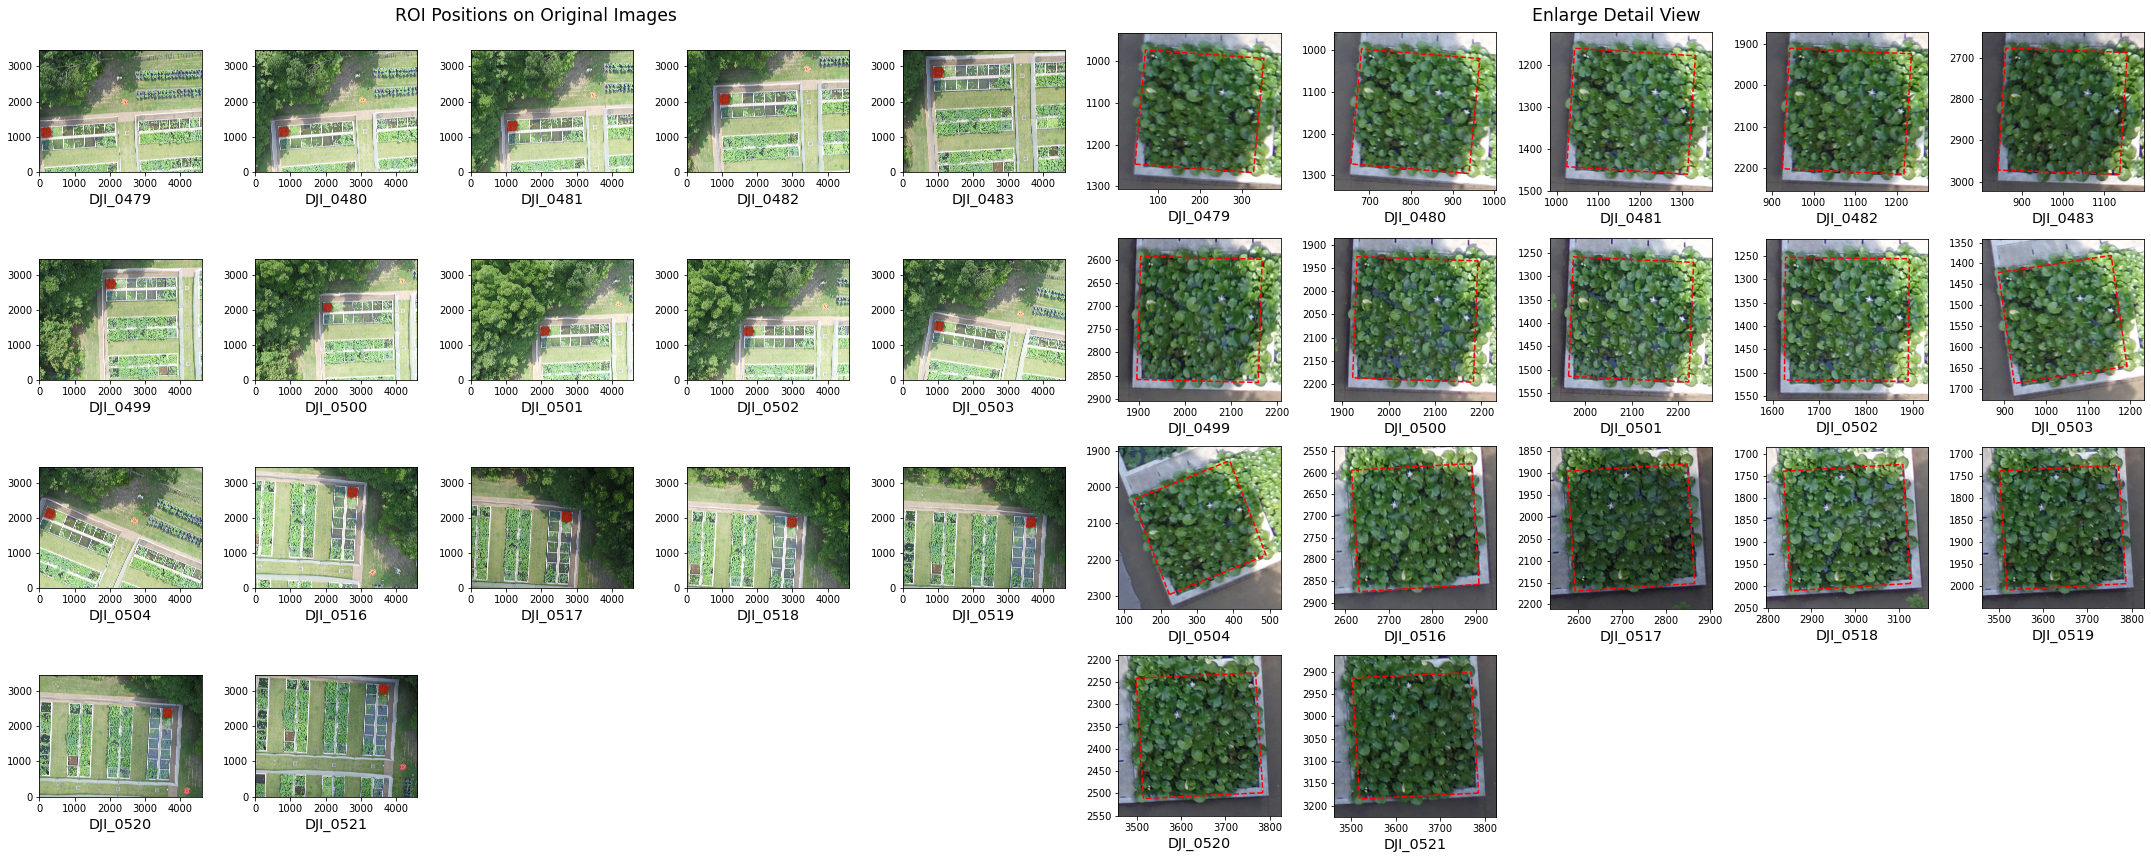

<Figure size 640x480 with 0 Axes>

In [13]:
# or all images with that polygon ID
ms.show_roi_on_img(img_dict_ms, "N1W1")

In [19]:
# count of images with polygon ID
len(img_dict_ms["N1W1"])

17

In [15]:
# save the best 3 images to folder using minimum distance from image to ROI
img_dict_sort = ms.sort_img_by_distance(
    img_dict_ms, roi,
    distance_thresh=10,  # distance threshold is 2m
    num=3,
    save_folder="Lotus_example_best3_per_ROI"   # only keep 3 closest images
)

Filter by distance to ROI: 100%|██████████| 112/112 [00:00<00:00, 4307.69it/s]


Optimising data structures of produced results, this may take some time...


Processing image [DJI_0545]: 100%|██████████| 85/85 [00:25<00:00,  3.36it/s]


In [16]:
# view the polygon pixel coords for best 3 images for one polygon ID
img_dict_sort["N1W1"]

{'DJI_0500': array([[1922.56317388, 2186.55026189],
        [1931.87582443, 1925.40596005],
        [2192.17577494, 1934.43920422],
        [2182.74834425, 2195.88054753],
        [1922.56317388, 2186.55026189]]),
 'DJI_0517': array([[2865.83794762, 2151.98114351],
        [2592.43855339, 2169.39562177],
        [2574.82262614, 1895.174961  ],
        [2848.48455612, 1878.83422189],
        [2865.83794762, 2151.98114351]]),
 'DJI_0501': array([[1964.74098122, 1514.46208262],
        [1974.95313876, 1258.05047872],
        [2233.01889149, 1269.92769909],
        [2222.63045454, 1526.62893413],
        [1964.74098122, 1514.46208262]])}

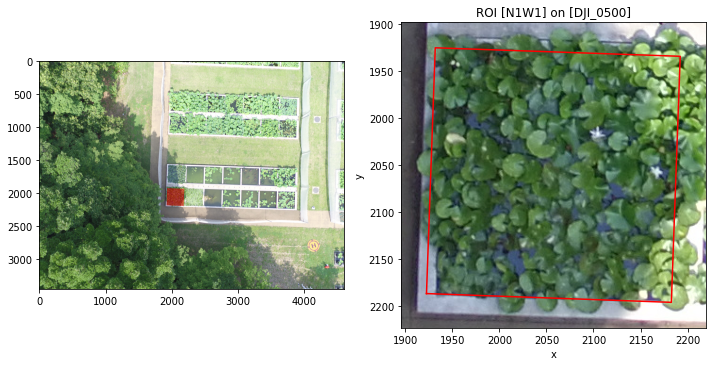

<Figure size 640x480 with 0 Axes>

In [17]:
# preview result for one image
ms.show_roi_on_img(img_dict_ms, "N1W1", "DJI_0500")

Reading image files for plotting: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


Image data loaded, drawing figures, this may cost a few seconds...


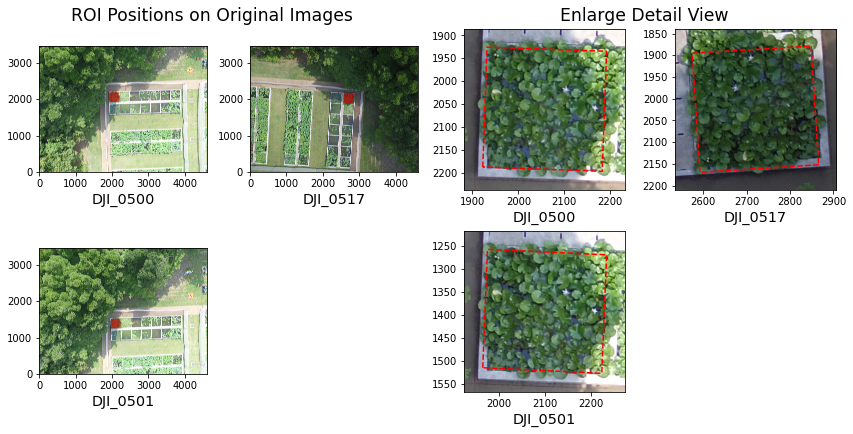

<Figure size 640x480 with 0 Axes>

In [18]:
# or for all 3 best
ms.show_roi_on_img(img_dict_sort, "N1W1", save_as="preview_all.png")